In [1]:
from features.affine_base import affine_detect
from models.alternative_random_forests import AlternatingDecisionForests
import cv2
import numpy as np

features


In [2]:
img_path="/home/cde/.ghq/bitbucket.org/internship18uec_nectec/train_marker/data/raw/marker_mugcup.png"
mask_path="/home/cde/.ghq/bitbucket.org/internship18uec_nectec/train_marker/data/raw/mask_mugcup.png"

In [3]:
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
detector = cv2.ORB_create()

In [5]:
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask.shape

(480, 640)

In [6]:
keypoints, descriptions = affine_detect(detector, gray, mask)

1278


In [7]:
reuslt_keypoints = cv2.drawKeypoints(img,  keypoints, None, flags=4)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
r_k_img =  cv2.cvtColor(reuslt_keypoints, cv2.COLOR_BGR2RGB)

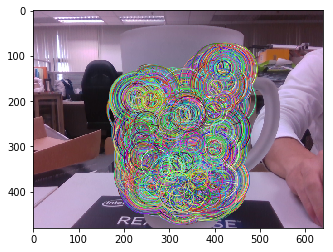

In [10]:
plt.imshow(r_k_img)

In [11]:
from sklearn import cluster, preprocessing, mixture #機械学習用のライブラリを利用

In [12]:
import pandas as pd

In [13]:
base_keypoints, base_desc = detector.detectAndCompute(gray, mask)

In [14]:
len(base_keypoints)

500

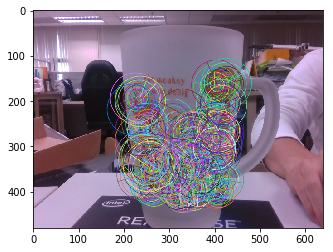

In [15]:
bk_gimg = cv2.drawKeypoints(img,  base_keypoints, None, flags=4)
bk_cimg =  cv2.cvtColor(bk_gimg, cv2.COLOR_BGR2RGB)
plt.imshow(bk_cimg)

In [16]:
pts = np.array([kp.pt for kp in base_keypoints], np.float32).reshape(-1, 2)

In [17]:
pts.shape

(500, 2)

In [18]:
pts

array([[409.     , 379.     ],
       [391.     , 380.     ],
       [349.     , 264.     ],
       [393.     , 378.     ],
       [396.     , 402.     ],
       [325.     , 415.     ],
       [391.     , 401.     ],
       [375.     , 402.     ],
       [395.     , 371.     ],
       [393.     , 217.     ],
       [351.     , 276.     ],
       [388.     , 382.     ],
       [411.     , 159.     ],
       [389.     , 308.     ],
       [333.     , 412.     ],
       [251.     , 383.     ],
       [408.     , 161.     ],
       [247.     , 363.     ],
       [306.     , 241.     ],
       [377.     , 402.     ],
       [271.     , 383.     ],
       [431.     , 165.     ],
       [372.     , 400.     ],
       [262.     , 359.     ],
       [338.     , 410.     ],
       [266.     , 356.     ],
       [323.     , 400.     ],
       [396.     , 398.     ],
       [400.     , 354.     ],
       [228.     , 189.     ],
       [409.     , 400.     ],
       [231.     , 192.     ],
       [

In [19]:
from sklearn.neighbors import KDTree

In [20]:
tmp_kdt = KDTree(pts, leaf_size=(pts.shape[0]/3), metric='euclidean')

In [21]:
tmp_ind, tmp_dist = tmp_kdt.query_radius(pts, r=0.5, return_distance=True)

In [29]:
tmp_ind_lengthes = np.array([len(i) for i in tmp_ind])
key_ids = np.arange(tmp_ind_lengthes.shape[0])

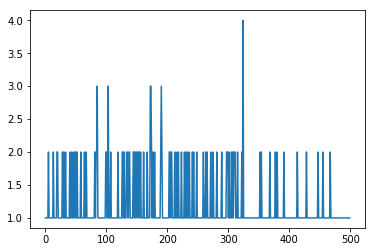

In [30]:
plt.plot(key_ids, tmp_ind_lengthes)

In [31]:
max_id = np.argmax(tmp_ind_lengthes)
max_ids = tmp_ind[tmp_ind_lengthes > 3]
tmp_ind_lengthes[max_id]
tmp_ind[max_id]
print(max_id)
max_ids
for mis in max_ids:
    for mi in mis:
        print(mi)
        print(tmp_ind[mi])
        print(tmp_dist[mi])
        print(pts[mi])
# for max_id in max_ids:
#     ma
# for x in tmp_ind[max_id]:
#     print(x)
#     print(tmp_ind[x])
#     print(pts[x])

324
324
[324 190 103 204]
[0.         0.19788918 0.19785957 0.40730714]
[317.95203 407.80804]
190
[324 190 103]
[1.97889176e-01 0.00000000e+00 3.05175781e-05]
[318.      408.00003]
103
[324 190 103]
[1.97859569e-01 3.05175781e-05 0.00000000e+00]
[318. 408.]
204
[324 204]
[0.40730714 0.        ]
[318.24002 407.52002]


In [36]:
klass_index = list(i for i in range(len(pts)))
for max_num in range(np.max(tmp_ind_lengthes) -1, 0, -1):
    max_ids = tmp_ind[tmp_ind_lengthes > max_num]
    for mis in max_ids:
        for i in mis:
            klass_index[i] = i
            tmp_ind_lengthes[i] = 0
    

In [38]:
train_pts = np.array([kp.pt for kp in keypoints], np.float32).reshape(-1, 2)
train_pts[0]

array([337.3424 , 416.15396], dtype=float32)

In [39]:
kdt = KDTree(train_pts, leaf_size=(pts.shape[0]/3), metric='euclidean')

In [40]:
result_ind = kdt.query_radius(pts, r=0.5)

In [41]:
result_ind.shape

(500,)

In [42]:
a = np.array([len(i) for i in result_ind])

In [43]:
y = np.arange(a.shape[0])

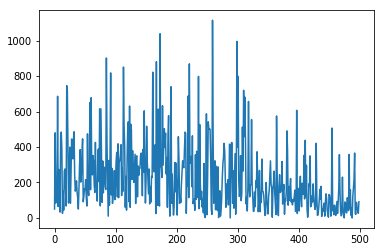

In [44]:
plt.plot(y, a)

In [45]:
print("{}, {}".format(np.max(a), np.argmax(a)))
idx = np.argmax(a)
#result_ind[61]

1115, 259


In [46]:
result_ind[idx]

array([253845, 283927, 280758, ..., 424573, 152507, 378684])

In [47]:
x = train_pts[result_ind[idx],:][:,0]
y = train_pts[result_ind[idx],:][:,1]

In [48]:
q_x, q_y = pts[idx] 

/home/cde/.ghq/bitbucket.org/internship18uec_nectec/train_marker/.venv/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


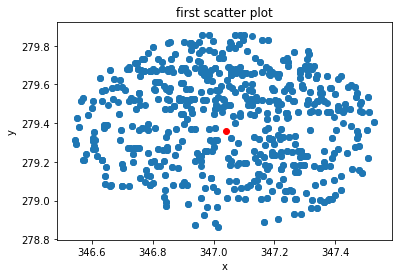

In [49]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)


ax.scatter(x,y)
ax.scatter(q_x, q_y, c='red')

ax.set_title('first scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.show()

(4, 4, 3)


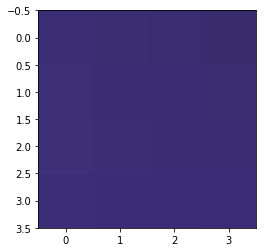

In [50]:
oft=2
rot=img[int(q_x-oft):int(q_x+oft), int(q_y-oft):int(q_y+oft), :]
print(rot.shape)
plt.imshow(rot)

In [51]:
X =  train_pts[result_ind[64],:] # (x, y)
A_transrate = np.array([1, 0, 0, 0, 1, 0, -(q_x-oft), -(q_y-oft), 1]).reshape(3, 3)
w = np.ones((X.shape[0],1))
X_w=np.append(X, w, axis=1) #列方向

In [52]:
X_w_moved = np.dot(X_w, A_transrate)

In [53]:
type(keypoints)

list

In [54]:
a = [keypoints[i] for i in result_ind[idx]]
a[0]

<KeyPoint 0x7f1dc292dae0>

In [55]:
tmp_keypoints = list( cv2.KeyPoint(x=kp.pt[0]-q_x+oft,
                              y=kp.pt[1]-q_y+oft,
                              _size=kp.size,
                              _angle=kp.angle,
                              _response=kp.response,
                              _octave=kp.octave,
                              _class_id=kp.class_id) for kp in a )

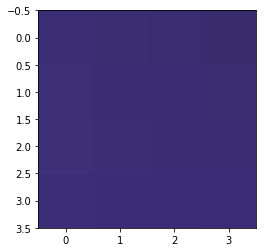

In [56]:
x_cimg = cv2.drawKeypoints(rot,  tmp_keypoints, None, flags=2)
plt.imshow(x_cimg)

In [57]:
result_length = np.array([len(i) for i in result_ind])
print( result_length.shape)

(500,)


In [58]:
median = np.median(result_length)
median

168.0

In [59]:
sort_ids = np.argsort(result_length)
sort_len = np.sort(result_length)

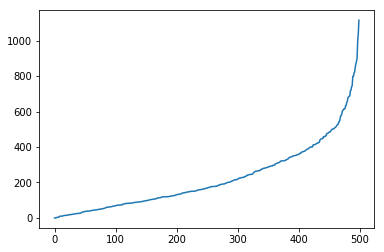

In [60]:
plt.plot(sort_len)

In [61]:
sort_ids[-1]

259

In [62]:
sort_len[len(sort_ids)//2]

169

In [63]:
result_length[59]

159

In [64]:
Good_keypoint_label=sort_ids[sort_len > 200] #reference system で良い（２００点以上）キーポイントのインデックス

In [65]:
len(Good_keypoint_label)

215

In [66]:
descriptions.dtype

dtype('uint8')

In [67]:
result_ind[Good_keypoint_label[0]]

array([265522, 264522, 271996, 220352, 259978, 219350, 257996, 273036,
       309648, 310650, 275018, 256956,  22578, 267511, 505598, 483069,
        45122, 152458, 378635, 332305, 354915, 174198, 424772, 107325,
       196771, 222344, 312642, 409710, 107835, 190245, 425282,  24079,
       333318, 507099, 241577, 188851, 197784, 286695, 340829, 339435,
       122513, 279198, 249116, 258497, 355847, 189853, 356845, 176128,
       273537, 340437, 175130, 266022, 150998,  46618,  48135, 484565,
       486082,  25107, 506098,  23078,  24586, 508127, 265019, 507606,
       266985, 288151, 259481, 189293, 341935, 274521, 287224, 339877,
       243033, 242106, 266489, 191351, 219854, 310152, 377175, 311620,
       221863, 221322, 312161, 279566, 250484, 204290, 249484, 347293,
       181641, 349292, 112888, 324735,  15070, 183640, 513109, 280566,
       415213, 252462, 182642, 325689, 282544, 143248, 205244, 105500,
       422947, 384657, 348294, 184142, 316839,  16569, 349794, 514608,
      

In [68]:
kps = []
descs = []
_y_keypoints = []
for Gk_index in Good_keypoint_label:
    kps.append(base_keypoints[Gk_index])
    descs.append(base_desc[Gk_index].tolist())
    _y_keypoints.append(Gk_index)
    for ri in result_ind[Gk_index]: #reference systemのキーポイントに紐づくアフィン画像の特徴点
        kps.append(keypoints[ri])
        descs.append(descriptions[ri].tolist())
        _y_keypoints.append(Gk_index)

In [69]:
len(kps)

85328

In [70]:
descs = np.array(descs, dtype=descriptions.dtype)

In [71]:
descs.shape

(85328, 32)

In [72]:
_y_keypoints[-1]

259

In [74]:
from sklearn import ensemble, metrics, preprocessing #機械学習用のライブラリを利用
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

In [75]:
# 解説5：機械学習で分類する---------------------------------------------------
clf_result=ensemble.RandomForestClassifier(criterion='entropy', n_estimators=30, max_depth=15, random_state=1, n_jobs=-1,class_weight="balanced")

In [76]:
clf_result.fit(descs, _y_keypoints)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [78]:
# 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_val_score(clf_result, descs, _y_keypoints, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.6514893316363376
正解率の標準偏差 =  0.01076931524281961


In [79]:
in_img_path="/home/cde/.ghq/bitbucket.org/internship18uec_nectec/train_marker/data/raw/input.png"
in_img = cv2.imread(in_img_path)
in_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)
in_kps, in_descs = detector.detectAndCompute(in_gray, None)